<a href="https://colab.research.google.com/github/diegocastrovi/Python_2023/blob/main/Diego_Castro_Tarea_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio de Datos (EDA)
DIEGO CASTRO

1. Descripción General de los Datos

Se carga la base de datos


In [8]:
#Cargamos nuestra data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

risk_df = pd.read_excel("/content/drive/MyDrive/DS_Res_Pe/BOOTCAMP_PYTHON/TAREA EDA/Copia de bbdd_riesgo.xlsx")

risk_df.head(3)

,ID,MORA60,ATRASO,TIPOCASA,EDAD,FECHA_EMPLEO,TC,AHORRO,INGRESO,LINEA_TC,SALDO_DEUDOR,SCORE,ABONO_PAGO,DEPARTAMENTO,RIESGO_SBS,EDUCACION
0,1,0,235,FAMILIAR,30,2007-06-01,93,5,3500.0,0.00,0.00,214,5,Lima,4,PROFESIONAL
1,2,0,18,FAMILIAR,32,2005-02-01,9,12,900.0,1824.67,1933.75,175,12,La Libertad,1,TECNICO
2,3,0,0,FAMILIAR,26,2003-08-01,8,2,2400.0,2797.38,188.29,187,0,Lima,0,PROFESIONAL


 - ¿Cuántas observaciones y variables contiene el conjunto de datos?


In [ ]:
risk_df.shape

(5000, 16)

Se tienen 16 variables con 5000 observaciones

 - ¿Qué tipos de variables (numéricas, categóricas) se incluyen en el conjunto de datos y cómo se distribuyen?

Tipo de datos de las variables en la vase de datos:

In [ ]:
risk_df.dtypes

ID                       int64
MORA60                   int64
ATRASO                   int64
TIPOCASA                object
EDAD                     int64
FECHA_EMPLEO    datetime64[ns]
TC                       int64
AHORRO                   int64
INGRESO                float64
LINEA_TC               float64
SALDO_DEUDOR           float64
SCORE                    int64
ABONO_PAGO               int64
DEPARTAMENTO            object
RIESGO_SBS               int64
EDUCACION               object
dtype: object

Como se distribuyen los tipos de datos:

In [ ]:
risk_df.dtypes.value_counts()

int64             9
object            3
float64           3
datetime64[ns]    1
dtype: int64

# 2. Estadísticas Descriptivas
   - ¿Cuál es la edad promedio de los clientes en el conjunto de datos?
  

In [ ]:
risk_df["EDAD"].mean()

36.4294

 - Proporcione las estadísticas descriptivas (media, mediana, desviación estándar, mínimo, máximo) para las variables numéricas.


In [ ]:
risk_df.describe(include=[np.number])

,ID,MORA60,ATRASO,EDAD,TC,AHORRO,INGRESO,LINEA_TC,SALDO_DEUDOR,SCORE,ABONO_PAGO,RIESGO_SBS
count,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000
mean,2500.500000,0.700000,4.48080,36.429400,25.386000,10.571000,4373.572006,10236.736330,5732.438204,196.762400,7.90080,0.563600
std,1443.520003,0.458303,13.94524,9.787225,32.014265,3.396125,5393.520235,19853.871452,10869.692111,19.416316,5.27755,0.902728
min,1.000000,0.000000,0.00000,20.000000,0.000000,0.000000,123.700000,0.000000,0.000000,134.000000,0.00000,0.000000
25%,1250.750000,0.000000,0.00000,29.000000,0.000000,12.000000,1400.000000,389.365000,283.605000,182.000000,0.00000,0.000000
50%,2500.500000,1.000000,0.00000,34.000000,12.000000,12.000000,2400.000000,2915.955000,2077.105000,197.000000,12.00000,0.000000
75%,3750.250000,1.000000,2.00000,42.000000,39.000000,12.000000,4900.000000,9763.387500,5384.220000,212.000000,12.00000,1.000000
max,5000.000000,1.000000,245.00000,85.000000,130.000000,12.000000,30000.000000,121543.400000,57094.380000,266.000000,12.00000,4.000000


   - Muestre estas medidas de tendencia central en un BoxPlot para cada variable mencionada.
  

Boxplot de MORA60:


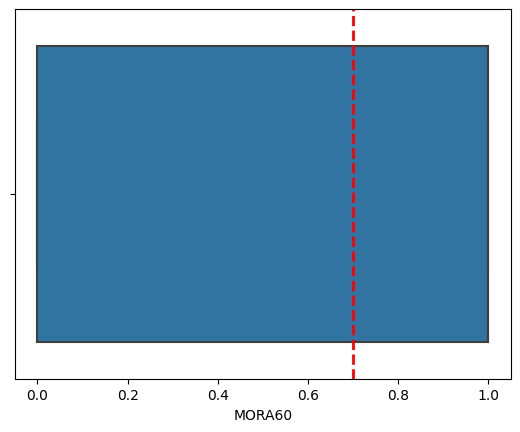



Boxplot de ATRASO:


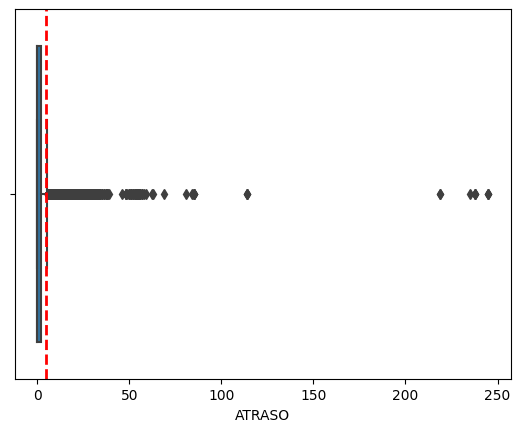



Boxplot de EDAD:


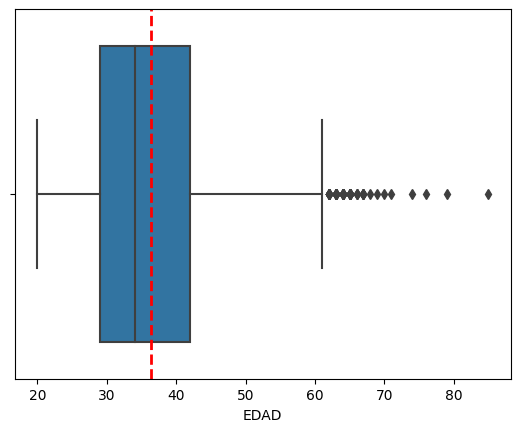



Boxplot de TC:


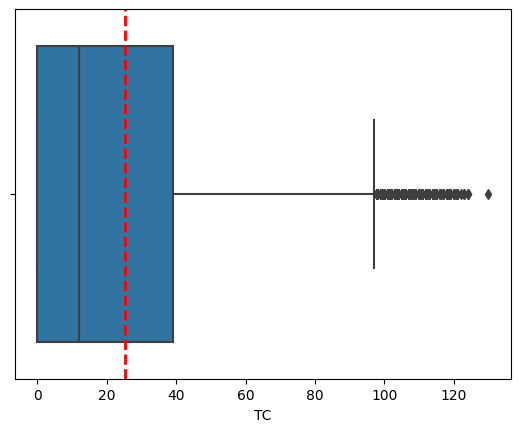



Boxplot de AHORRO:


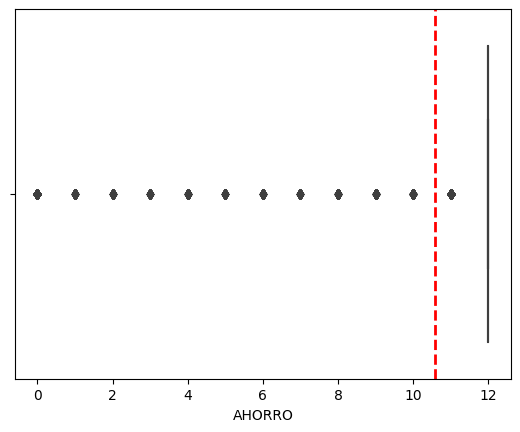



Boxplot de INGRESO:


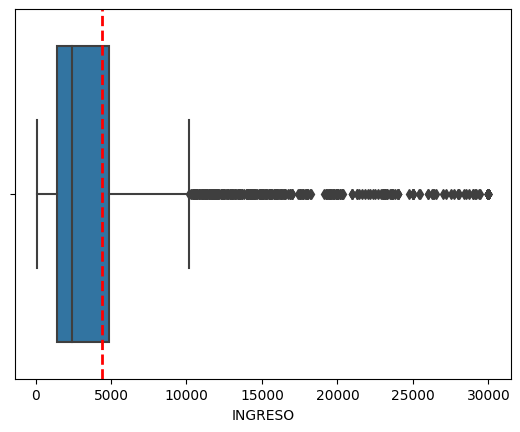



Boxplot de LINEA_TC:


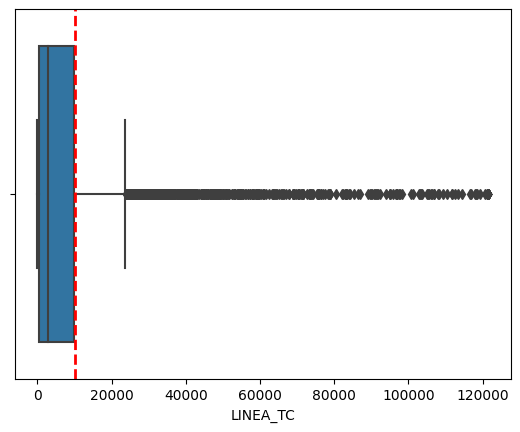



Boxplot de SALDO_DEUDOR:


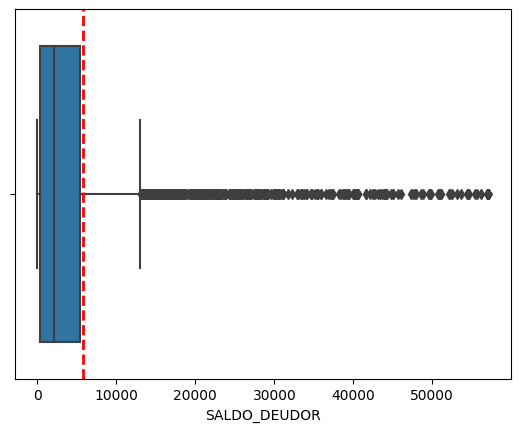



Boxplot de SCORE:


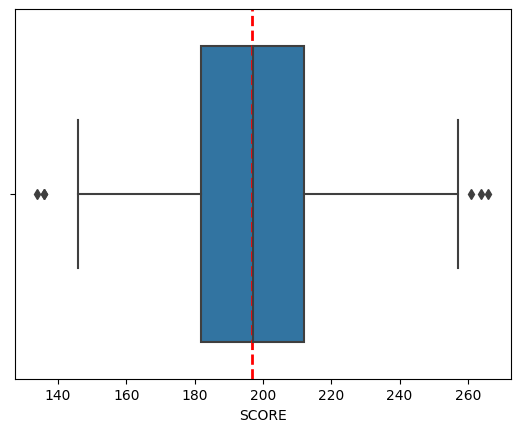



Boxplot de ABONO_PAGO:


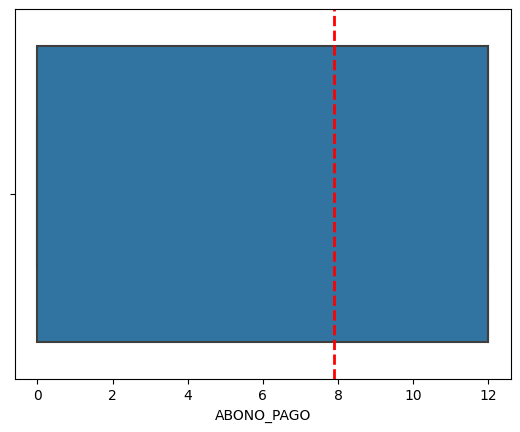



Boxplot de RIESGO_SBS:


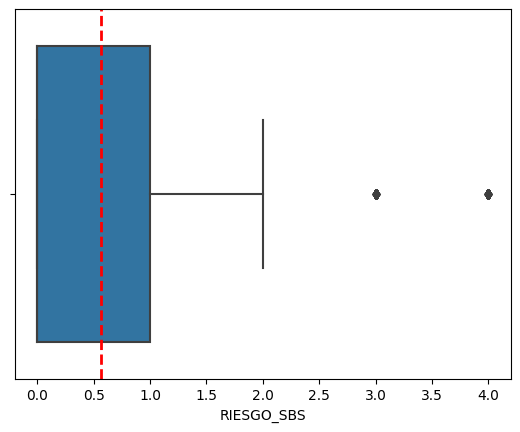

In [9]:
#se define una función para crear boxplots de cada variable

def print_boxplot(df, variable):
    sns.boxplot(
        data=df,
        x=variable,
    )

    plt.axvline(
        x=df[variable].mean(),
        color='red',
        linestyle='dashed',
        linewidth=2
    )
    plt.show()

#se crea un df solo con los nombres de las variables númericas
column_names = risk_df.select_dtypes(include = ["number"])[0:]

# No se necesita un boxplot de ID
column_names = column_names.drop('ID',axis=1)

#se crea un loop que vaya creando los boxplot de todas las variables
for column in column_names:
  print('Boxplot de ' + column + ':')
  print_boxplot(risk_df, column)
  print('\n')



 - Proporcione estadísticas para las variables categóricas (texto).

In [ ]:
risk_df.describe(include = object)

,TIPOCASA,DEPARTAMENTO,EDUCACION
count,5000,5000,5000
unique,4,25,5
top,FAMILIAR,Lima,PROFESIONAL
freq,3471,2948,2666


# 3. Análisis de Valores Faltantes
   - ¿Hay alguna variable con valores faltantes en el conjunto de datos?


In [ ]:
risk_df.isnull().any()

ID              False
MORA60          False
ATRASO          False
TIPOCASA        False
EDAD            False
FECHA_EMPLEO    False
TC              False
AHORRO          False
INGRESO         False
LINEA_TC        False
SALDO_DEUDOR    False
SCORE           False
ABONO_PAGO      False
DEPARTAMENTO    False
RIESGO_SBS      False
EDUCACION       False
dtype: bool

De lo obtenido se puede observar que ninguna variable tiene datos faltantes, y podemos comprobarlo con el siguiente código también

In [ ]:
risk_df.isnull().sum().sum()

0

# 4. Visualización de Datos
   - Genere un gráfico de barras para todas las variables numéricas.
   


In [ ]:
freq = d['MORA60'].value_counts()

freq.plot(kind='bar', color='skyblue')
plt.title('MORA60')
plt.xlabel('')
plt.ylabel('Frecuencia')
plt.show()

Bar plot de MORA60:


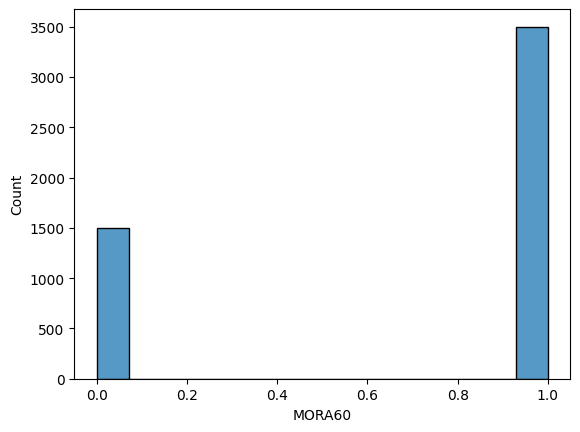



Bar plot de ATRASO:


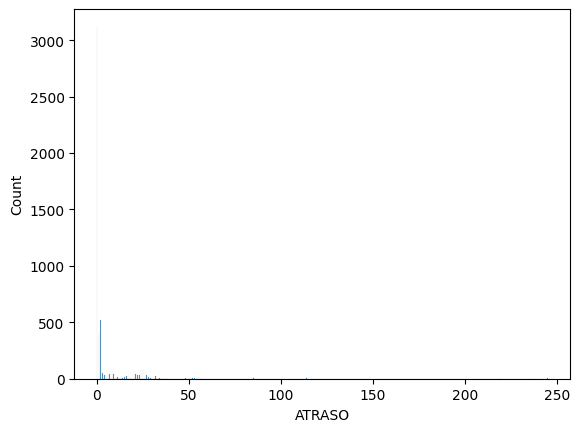



Bar plot de EDAD:


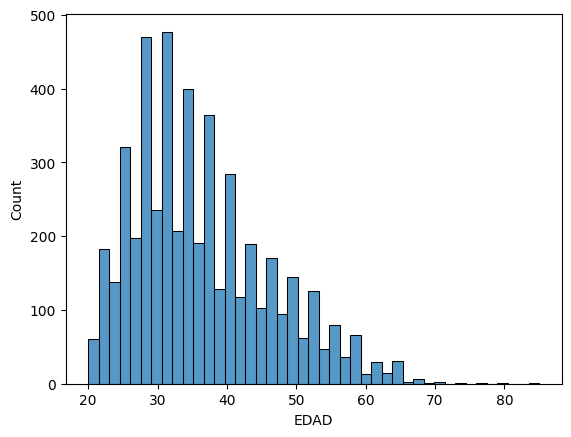



Bar plot de TC:


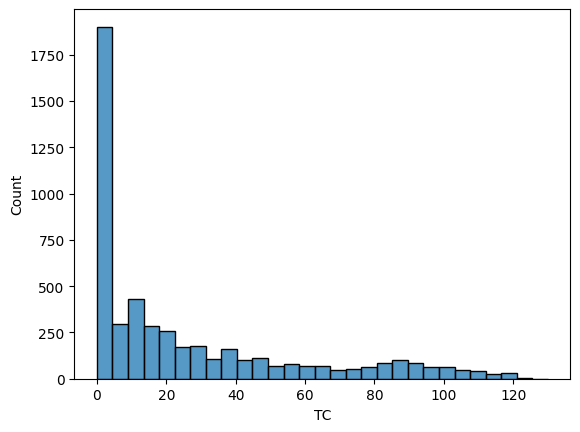



Bar plot de AHORRO:


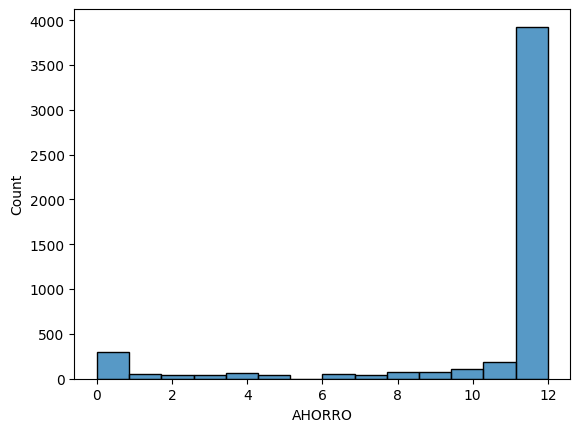



Bar plot de INGRESO:


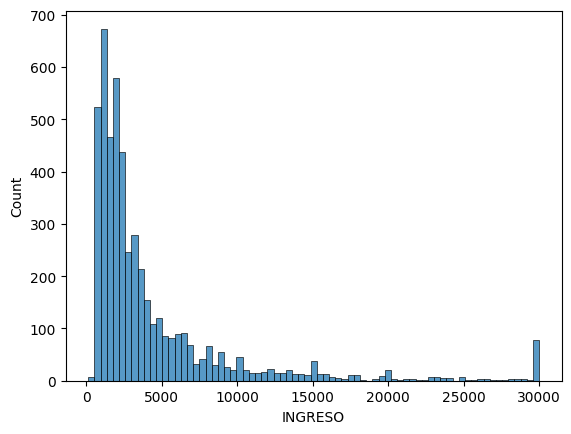



Bar plot de LINEA_TC:


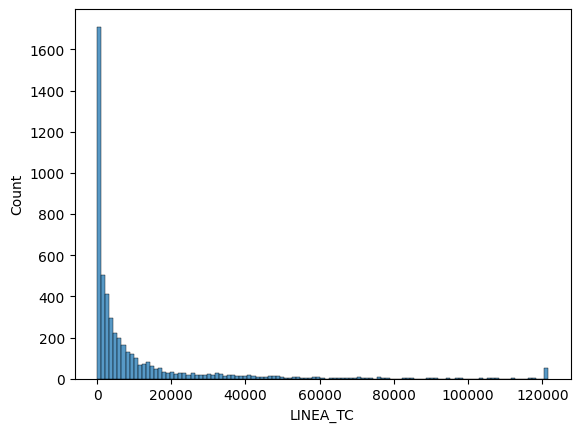



Bar plot de SALDO_DEUDOR:


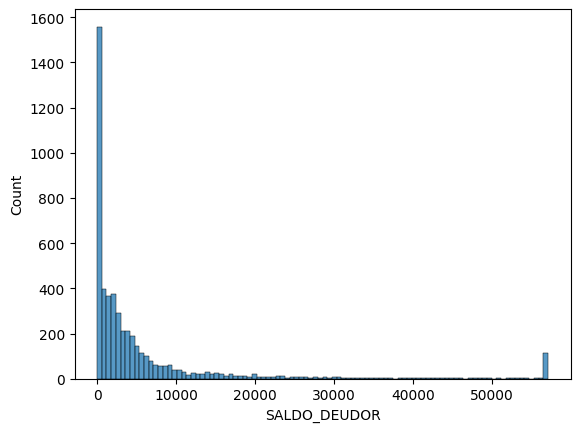



Bar plot de SCORE:


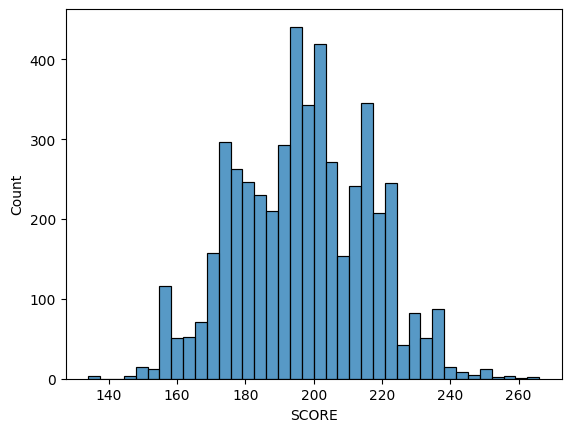



Bar plot de ABONO_PAGO:


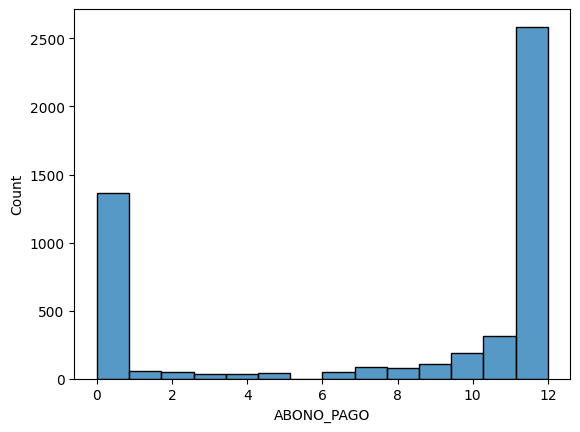



Bar plot de RIESGO_SBS:


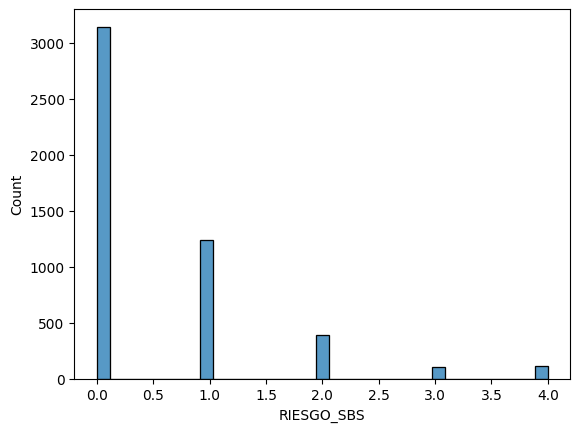

In [10]:
#similarmente al código que usamos para los boxplots


def print_barplot_sns(df, variable):
    sns.histplot(
        data=df,
        x=variable,
    )
    plt.show()



for column in column_names:
  print('Bar plot de ' + column +':')
  print_barplot_sns(risk_df, column)
  print('\n')

- Genere un gráfico de barras para mostrar la frecuencia de las variables categoricas.


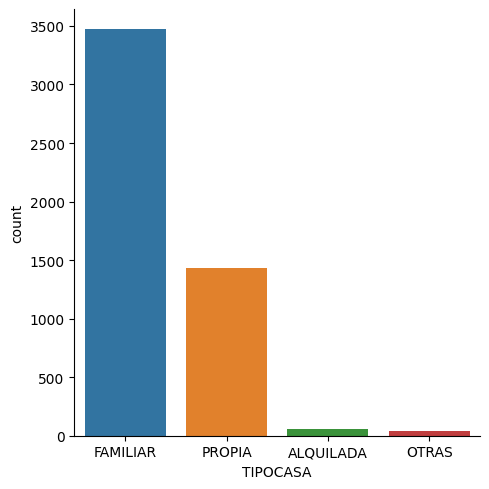

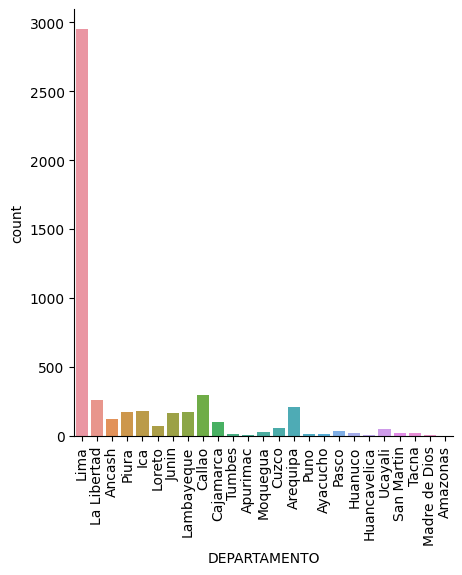

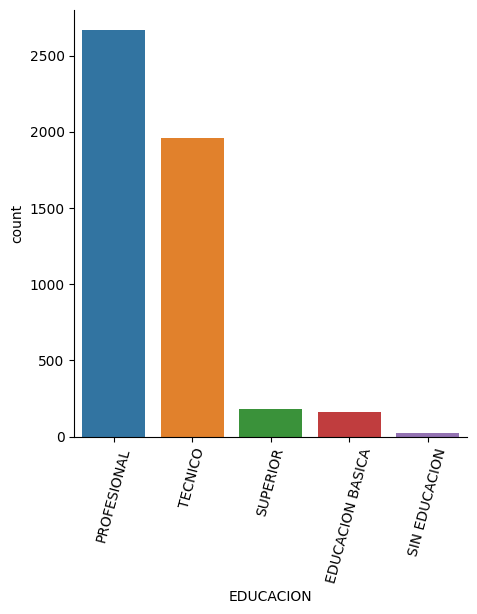

In [ ]:
#Se tiene 3 variables categóricas:
#TIPO CASA
sns.catplot(
    data=risk_df,
    x='TIPOCASA',
    kind='count'
)
plt.show()

#DEPARTAMENTO
sns.catplot(
    data=risk_df,
    x='DEPARTAMENTO',
    kind='count'
)
plt.xticks(rotation=90)
plt.show()

#EDUCACION
sns.catplot(
    data=risk_df,
    x='EDUCACION',
    kind='count'
)
plt.xticks(rotation=75)
plt.show()





  - Genere graficas adicionales si considera para describir lo que esta observando en la base de datos.

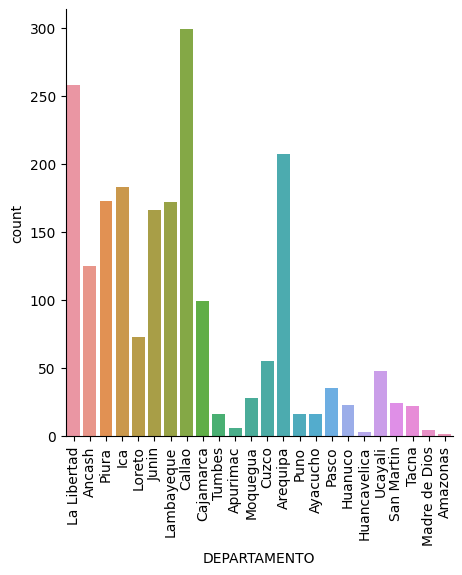

In [ ]:
#Distribución de los departamentos sin contar Lima
Deprtm_sin_lima = risk_df[risk_df['DEPARTAMENTO'] != 'Lima']


sns.catplot(
    data=Deprtm_sin_lima,
    x='x',
    hue='DEPARTAMENTO',
    multiple='fill'
)

plt.show()

# 5. Gráficos: Correlación y Relaciones
   - Grafique la correlación entre INGRESO y el monto de la línea de crédito de tarjeta de crédito.
  

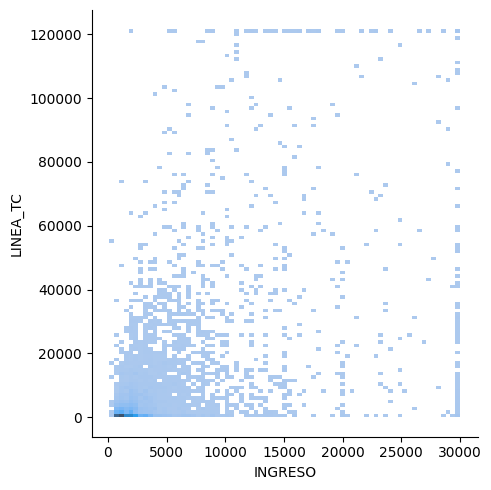

In [ ]:
sns.displot(
    data=risk_df,
    x='INGRESO',
    y='LINEA_TC'
)
plt.show()

 - Realice un diagrama de dispersión entre la EDAD y el RIESGO_SBS.



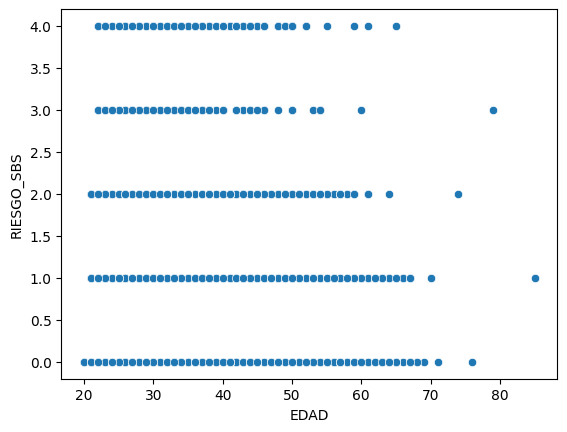

In [ ]:
sns.scatterplot(
    data=risk_df,
    x='EDAD',
    y='RIESGO_SBS'
)
plt.show()

- Realice un headmap para TIPOCASA y EDUCACION.



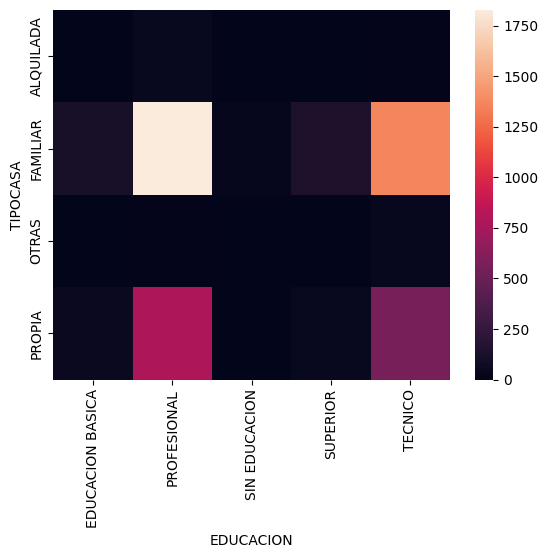

In [ ]:
corr = pd.crosstab(risk_df['TIPOCASA'],risk_df['EDUCACION'])
sns.heatmap(corr)
plt.show()

Realice un headmap para EDAD y RIESGO_SBS.







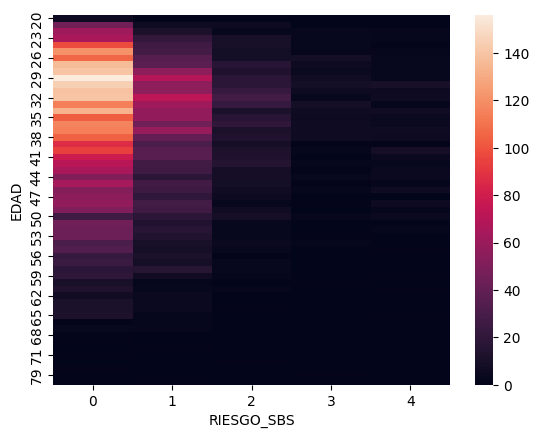

In [ ]:
corr = pd.crosstab(risk_df['EDAD'],risk_df['RIESGO_SBS'])
sns.heatmap(corr)
plt.show()

# 6. Análisis de Variable Objetivo
   - ¿Qué porcentaje de clientes ha tenido una morosidad mayor a 60 días (`MORA60`) después de la aprobación del crédito?
  

In [ ]:
por =(len(risk_df[risk_df['MORA60'] == 1])/ len(risk_df['MORA60'])) * 100
print("El porcentaje de clientes con morosidad mayor a 60 días es " + str(por) + '%')

El porcentaje de clientes con morosidad mayor a 60 días es 70.0%


 - Investigue si existe alguna relación entre el nivel educativo y la incidencia de morosidad mayor a 60 días. ¿Cómo podría visualizar esta relación?


In [ ]:
#Se muestra la cantidad de morosos en cada nivel educativo
Morosos = risk_df.groupby('EDUCACION')['MORA60']
Morosos

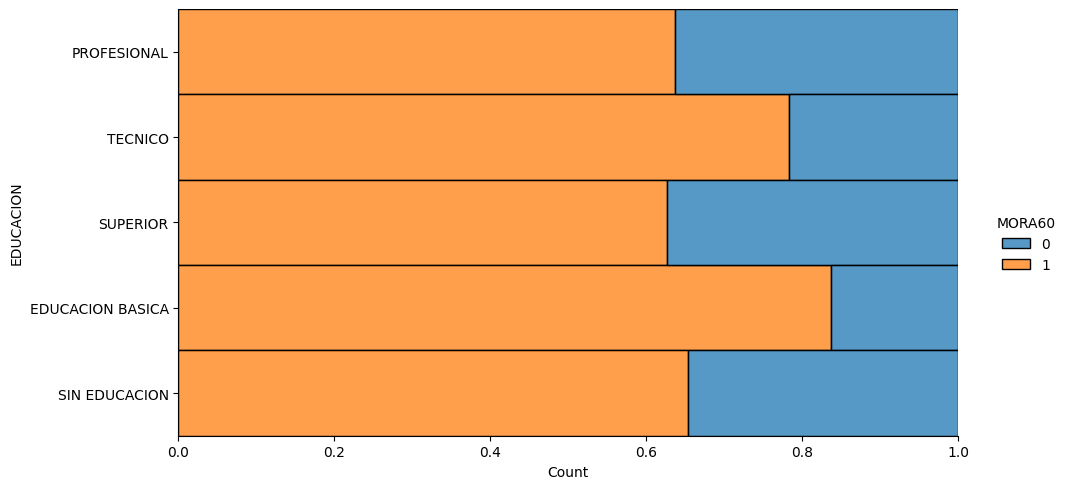

In [ ]:
#Se busca ver el porcentaje de morosos en cada nivel educativo

sns.displot(data=risk_df,
            y='EDUCACION',
            hue='MORA60',
            multiple='fill',
            aspect=2)
plt.show()

Se realizaron más gráficos de este tipo para analizar la relación entre la morosidad y las demás variables

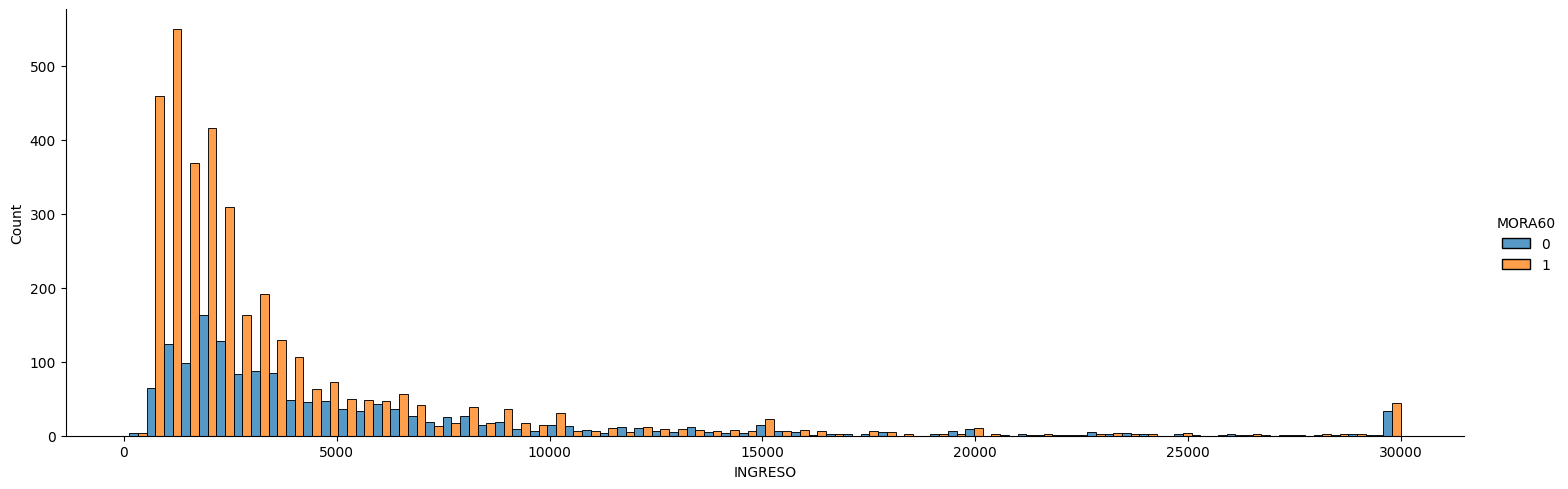

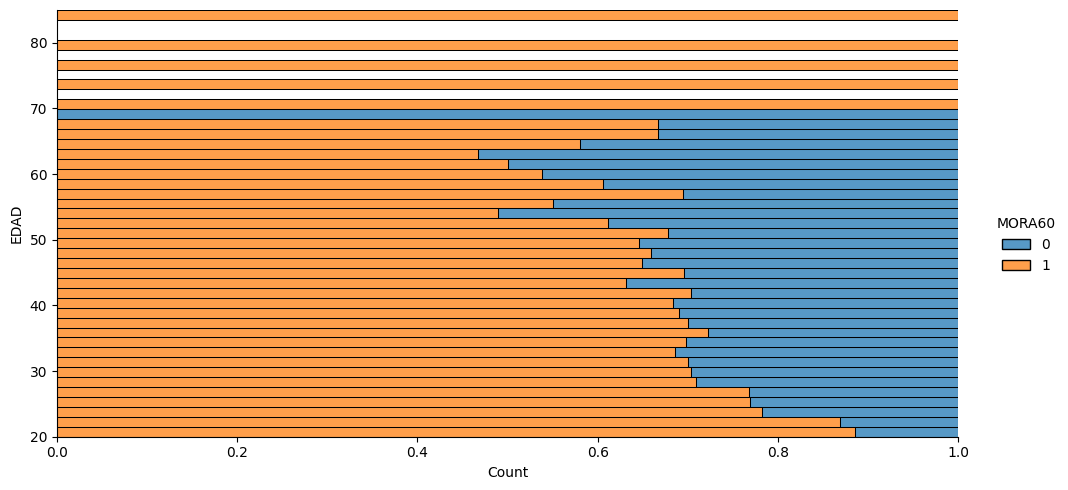

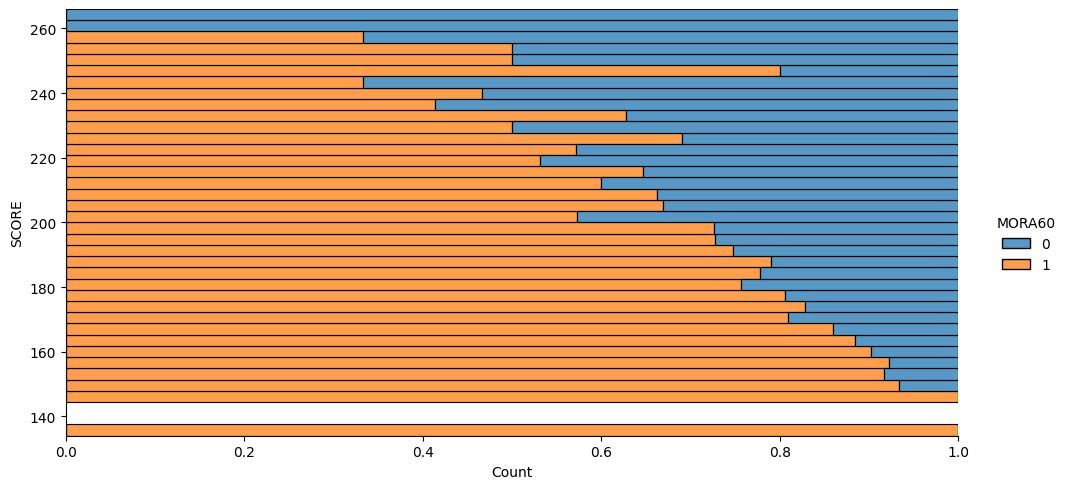

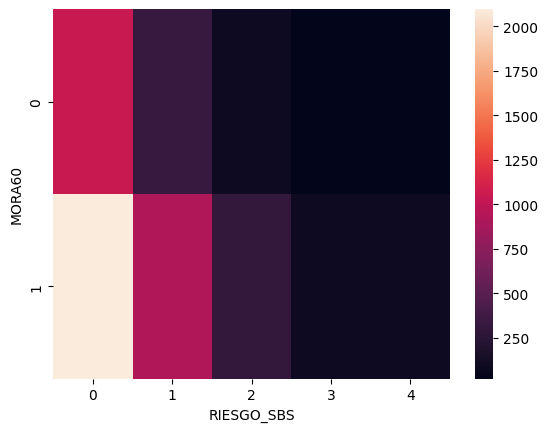

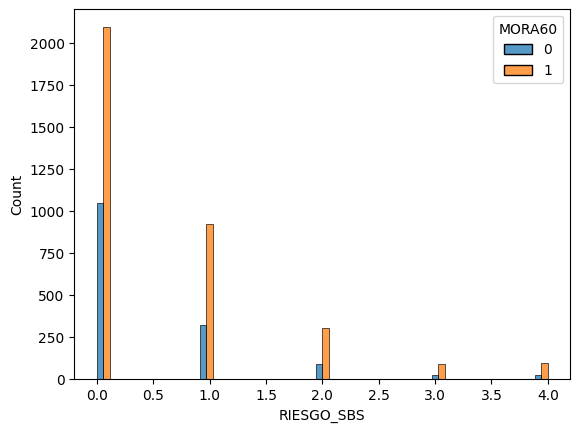

In [ ]:
#Distribución del ingreso de las personas y su realción con la morosidad

sns.displot(data=risk_df,
            x='INGRESO',
            hue='MORA60',
            multiple = 'dodge',
            aspect = 3
            )
plt.show()


# Relación entre la edad y morosidad de 60 días

sns.displot(data=risk_df,
            y='EDAD',
            hue='MORA60',
            multiple='fill',
            aspect=2)
plt.show()


# Relación entre el score y morosidad de 60 días

sns.displot(data=risk_df,
            y='SCORE',
            hue='MORA60',
            multiple='fill',
            aspect=2)
plt.show()

# Relación entre el riesgo sbs y morosidad de 60 días
corr = pd.crosstab(risk_df['MORA60'],risk_df['RIESGO_SBS'])
sns.heatmap(corr)
plt.show()

sns.histplot(data=risk_df,
            x='RIESGO_SBS',
            hue='MORA60',
            multiple='dodge'
            )
plt.show()

In [ ]:
#LOS GRAFICOS DE SBS VS MORA 60 NO PARECEN SER CONCLUYENTES, ES POSIBLE QUE NO HAYA MUCHA CORRELACIÓN ENTRE ESTAAS VARIABLES, SE VERIFICA QUE LA CORRELACIÓN ES BAJA (~0):
correlacion_numpy = np.corrcoef(risk_df['RIESGO_SBS'], risk_df['MORA60'])
print(correlacion_numpy)

[[1.         0.09109357]
 [0.09109357 1.        ]]


## 7. Pensamiento Crítico y Conclusiones
#  - Basándose en el análisis realizado, ¿qué factores parecen estar más asociados con el riesgo de morosidad en los clientes?
#


Según los gráficos realizados,
las variables que parecen estar más relacionados al riesgo de morosidad son los de la edad, el grado de educación, el score y el ingreso

#  - Brinde 3 conclusiones sobre el análisis realizado.



*   **La edad de las personas y el índice de morosidad están correlacionadas, al parecer a menor edad, la morosidad es mayor**
*  **Las personas con educación ténica y básica suelen tener mayor índice de morosidad que los demás**
*   **El SCORE y la morosidad están relacionadas directamente, las personas con scores más bajos suelen tener mayor morosidad**
*  **Las personas con menores ingresos presentan, también mayores índices de morosidad.**







